In [15]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from importance_sampling.core import ImportanceSampling
from importance_sampling.helpers import create_plot
import pandas as pd

In [16]:
def define_run():
    quantile = 99.95
    sample_sizes = [5000,
                    10000,
                    50000,
                    100000,
                    500000,
                    1000000]
    shifts = np.linspace(0, 6, 13)
    shifts = np.sort(np.append(shifts, norm.ppf(quantile / 100.0)))
    sim_sizes = 10
    kwargs = dict(quantile=quantile,
                  sample_sizes=sample_sizes,
                  shifts=shifts,
                  sim_sizes=sim_sizes,
                  pool_size=10)
    return kwargs

In [17]:
preload = True
my_kwargs = define_run()
my_df = pd.read_excel('results.xlsx') if preload else ImportanceSampling(**my_kwargs).run()

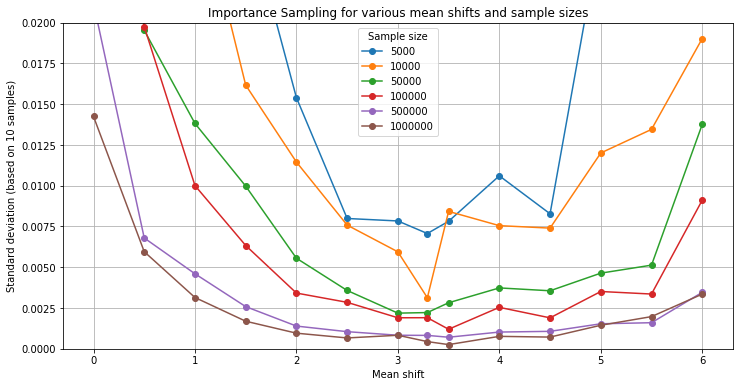

In [18]:
my_fig = create_plot(args=my_kwargs, df=my_df, figsize=12, dpi=500)
plt.show(my_fig)

In [19]:
my_df.head(10)

,sample_size,shift,sim_size,quantile,truth,mean,std_mean,std_true,min,max,time
0,5000,0.000000,10,99.95,3.290527,3.384157,0.188166,0.212478,3.060468,3.700396,1.4827
1,5000,0.500000,10,99.95,3.290527,3.270995,0.059338,0.062808,3.167322,3.347507,1.4950
2,5000,1.000000,10,99.95,3.290527,3.264412,0.040892,0.049294,3.219697,3.363513,1.8630
3,5000,1.500000,10,99.95,3.290527,3.283165,0.025885,0.027023,3.240346,3.334718,1.6197
4,5000,2.000000,10,99.95,3.290527,3.288561,0.015260,0.015400,3.260921,3.310846,1.4740
5,5000,2.500000,10,99.95,3.290527,3.287383,0.007272,0.007991,3.276376,3.299676,1.4761
6,5000,3.000000,10,99.95,3.290527,3.291895,0.007705,0.007839,3.284315,3.306208,1.6169
7,5000,3.290527,10,99.95,3.290527,3.291758,0.006949,0.007069,3.282926,3.302859,1.5917
8,5000,3.500000,10,99.95,3.290527,3.293787,0.007024,0.007820,3.282315,3.303740,1.5798
9,5000,4.000000,10,99.95,3.290527,3.295892,0.008975,0.010608,3.284768,3.308575,1.5778
